In [2]:
import numpy as np
import pandas as pd

a = np.array([75, 68, 73, 72, 71, 70, 65, 66, 76, 72, 70, 66])
b = np.array([34, 32, 29, 33, 34, 26, 29, 25, 30, 33, 36, 38])
c = np.array([1.0, 1.3, 1.2, 1.8, 1.9, 1.9, 1.0, 0.8, 1.5, 1.5, 1.6, 1.9])

df = pd.DataFrame(data=np.stack((a, b, c), axis=1), columns=["Variable A", "Variable B", "Variable C"])

In [3]:
df.head(12)

,Variable A,Variable B,Variable C
0,75.0,34.0,1.0
1,68.0,32.0,1.3
2,73.0,29.0,1.2
3,72.0,33.0,1.8
4,71.0,34.0,1.9
5,70.0,26.0,1.9
6,65.0,29.0,1.0
7,66.0,25.0,0.8
8,76.0,30.0,1.5
9,72.0,33.0,1.5


## Basic statistical analysis

In [4]:
df.describe()

,Variable A,Variable B,Variable C
count,12.000000,12.000000,12.000000
mean,70.333333,31.583333,1.450000
std,3.550501,3.895413,0.389639
min,65.000000,25.000000,0.800000
25%,67.500000,29.000000,1.150000
50%,70.500000,32.500000,1.500000
75%,72.250000,34.000000,1.825000
max,76.000000,38.000000,1.900000


## Create various graphs

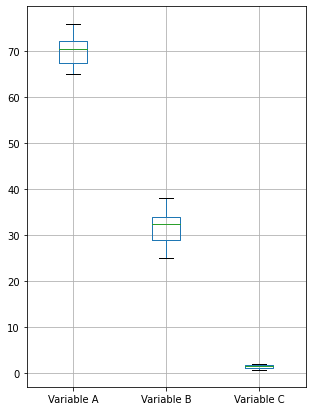

In [5]:
boxplot = df.boxplot(column=["Variable A", "Variable B", "Variable C"], figsize=(5, 7))

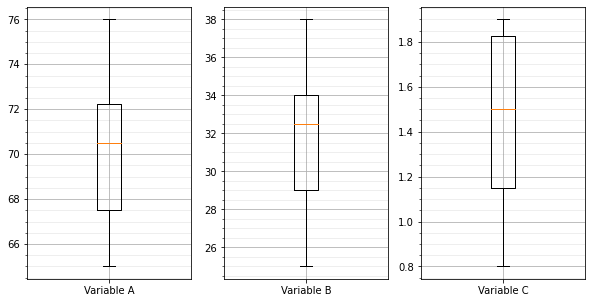

In [6]:
import matplotlib.pyplot as plt

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(df.columns), figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.tick_params(axis='y')
    ax.set_xticklabels([df.columns[i]])
    ax.grid()  # major grid lines
    ax.minorticks_on()   # minor grid lines
    ax.grid(b=True, which='minor', color='#999999', alpha=0.2)
plt.show()

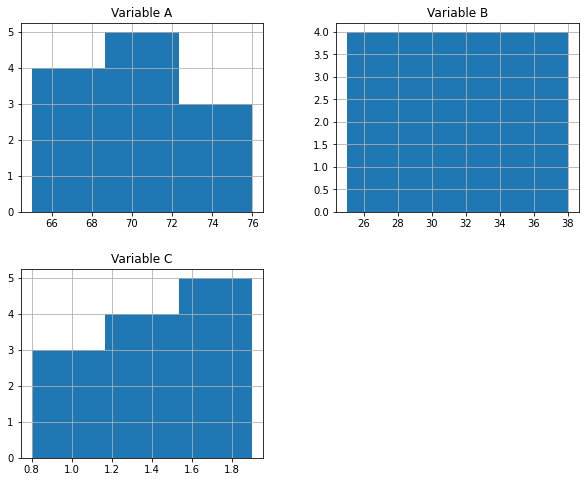

In [7]:
hist = df.hist(bins=3, figsize=(10, 8))

## Analyse correlation

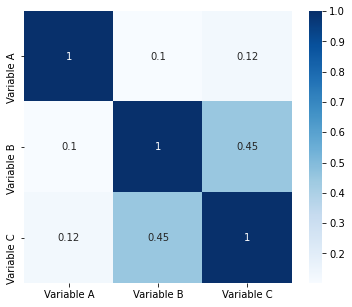

In [8]:
import seaborn as sns

plt.subplots(figsize=(6, 5))
corr = df.corr(method='pearson') # 'pearson', 'kendall', 'spearman'
corr_matrix = sns.heatmap(corr, annot=True, cmap='Blues')

## Residual plot

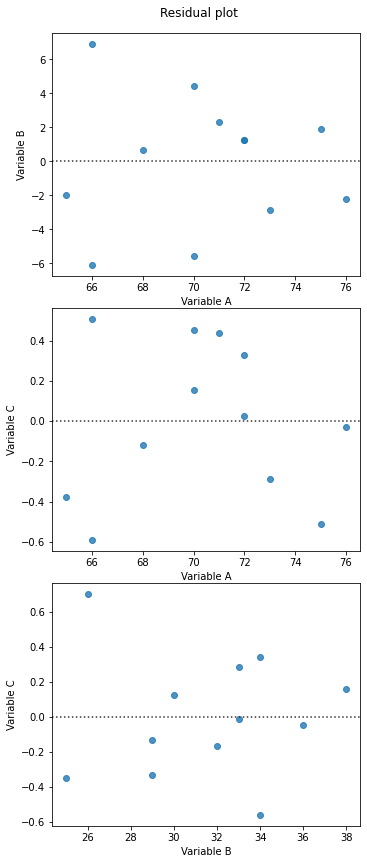

In [9]:
fig, axs = plt.subplots(len(df.columns), 1, figsize=(5, 12))
fig.suptitle("Residual plot")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
combinations = [['Variable A', 'Variable B'],
                ['Variable A', 'Variable C'],
                ['Variable B', 'Variable C']]
for i, comb in enumerate(combinations):
        sns.residplot(x=comb[0], y=comb[1], data=df, ax=axs[i])

## Scatter matrix

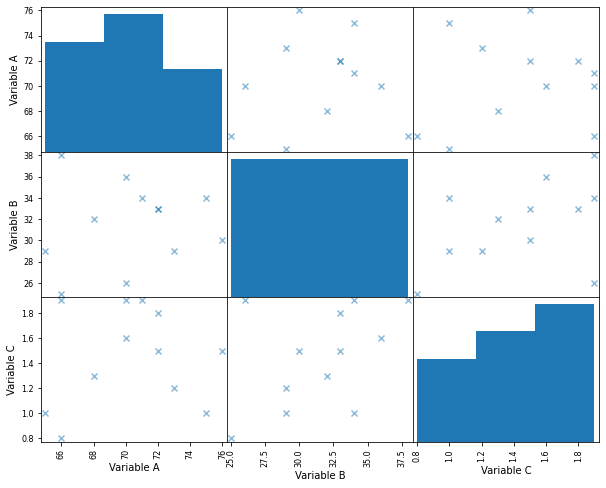

In [10]:
from pandas.plotting import scatter_matrix
scatter_mtrx = scatter_matrix(df, figsize=(10, 8),
                              hist_kwds={'bins':3},
                              marker='x')

## Regression model to make forecasts

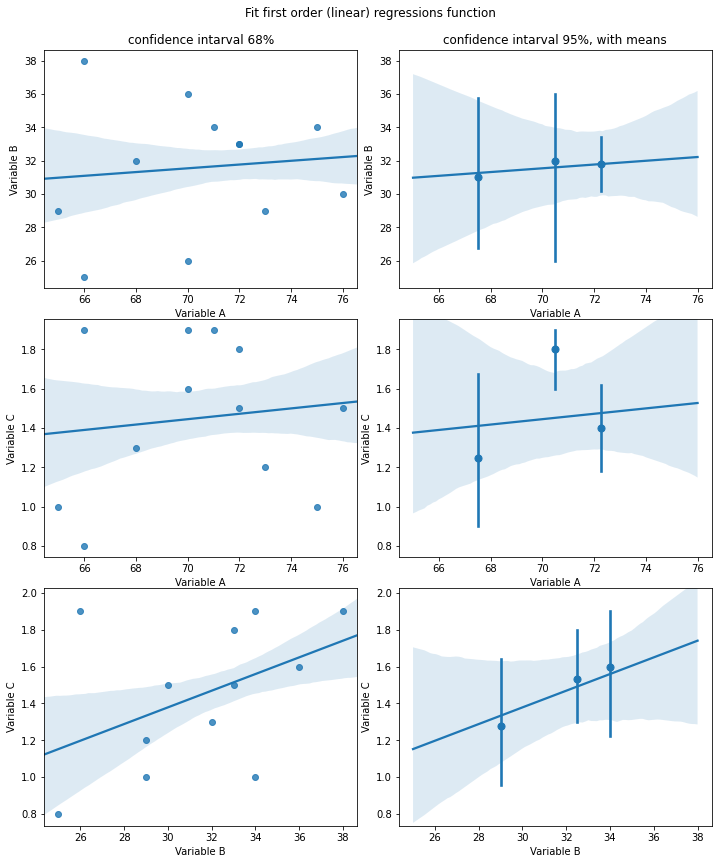

In [11]:
import seaborn as sns

fig, axs = plt.subplots(len(df.columns), 2, figsize=(10, 12))
fig.suptitle("Fit first order (linear) regressions function")
fig.tight_layout()
fig.subplots_adjust(top=0.93)
axs[0, 0].set_title("confidence intarval 68%")
axs[0, 1].set_title("confidence intarval 95%, with means")
combinations = [['Variable A', 'Variable B'],
                ['Variable A', 'Variable C'],
                ['Variable B', 'Variable C']]
for i, comb in enumerate(combinations):
    sns.regplot(x=comb[0], y=comb[1], data=df, ci=68, truncate=False, ax=axs[i, 0])
    sns.regplot(x=comb[0], y=comb[1], data=df, x_bins=3, ax=axs[i, 1])
    xlims = axs[i, 0].get_xlim()
    ylims = axs[i, 0].get_ylim()
    axs[i, 1].set_xlim(xlims)
    axs[i, 1].set_ylim(ylims)


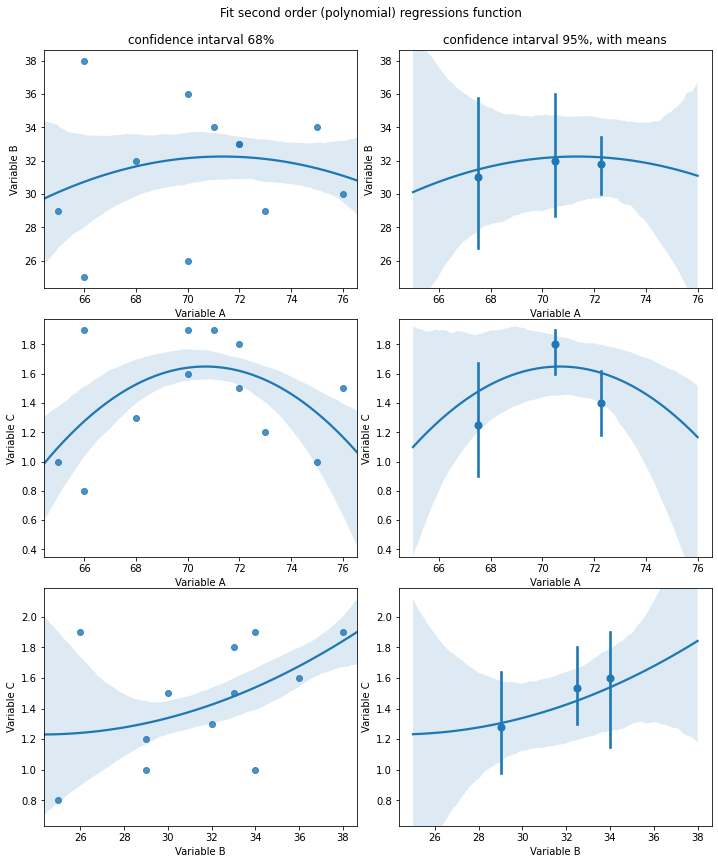

In [12]:
fig, axs = plt.subplots(len(df.columns), 2, figsize=(10, 12))
fig.suptitle("Fit second order (polynomial) regressions function")
fig.tight_layout()
fig.subplots_adjust(top=0.93)
axs[0, 0].set_title("confidence intarval 68%")
axs[0, 1].set_title("confidence intarval 95%, with means")
combinations = [['Variable A', 'Variable B'],
                ['Variable A', 'Variable C'],
                ['Variable B', 'Variable C']]
for i, comb in enumerate(combinations):
    sns.regplot(x=comb[0], y=comb[1], data=df, ci=68, truncate=False, order=2, ax=axs[i, 0])
    sns.regplot(x=comb[0], y=comb[1], data=df, x_bins=3, order=2, ax=axs[i, 1],)
    xlims = axs[i, 0].get_xlim()
    ylims = axs[i, 0].get_ylim()
    axs[i, 1].set_xlim(xlims)
    axs[i, 1].set_ylim(ylims)

## Evaluate their quality

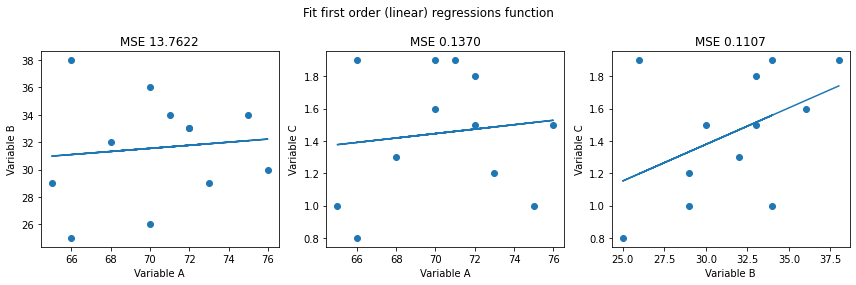

In [13]:
# Calculating prediction y values in sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1, len(df.columns), figsize=(12, 4))
fig.suptitle("Fit first order (linear) regressions function")
combinations = [['Variable A', 'Variable B'],
                ['Variable A', 'Variable C'],
                ['Variable B', 'Variable C']]
for i, comb in enumerate(combinations):
    model = LinearRegression()
    model.fit(df[[comb[0]]], df[[comb[1]]])
    predicted = model.predict(df[[comb[0]]])
    axs[i].scatter(df[comb[0]], df[comb[1]])
    axs[i].plot(df[comb[0]], predicted)
    axs[i].set_xlabel(comb[0])
    axs[i].set_ylabel(comb[1])
    mse = mean_squared_error(df[comb[1]], predicted)
    axs[i].set_title(f"MSE {mse:.4f}")

fig.subplots_adjust(top=0.93)
fig.tight_layout()


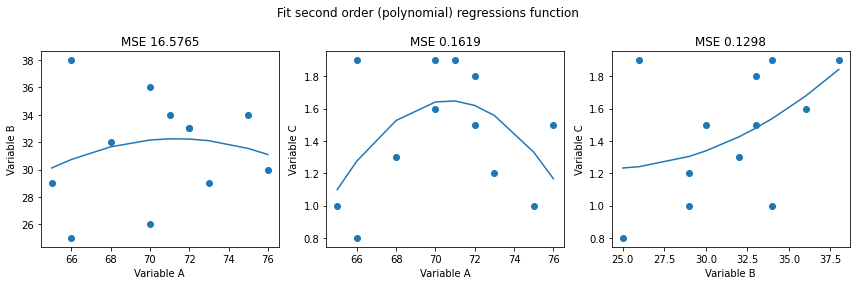

In [14]:
from sklearn.preprocessing import PolynomialFeatures

fig, axs = plt.subplots(1, len(df.columns), figsize=(12, 4))
fig.suptitle("Fit second order (polynomial) regressions function")
combinations = [['Variable A', 'Variable B'],
                ['Variable A', 'Variable C'],
                ['Variable B', 'Variable C']]
for i, comb in enumerate(combinations):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df[[comb[0]]].to_numpy().reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, df[[comb[1]]])    
    poly_predicted = poly_reg_model.predict(poly_features)
    poly_xy = np.stack((df[comb[0]], np.squeeze(poly_predicted)), axis=1)
    poly_soted = poly_xy[np.argsort(poly_xy[:, 0])]
    x_sorted = poly_soted[:, 0]
    predicted_sorted = poly_soted[:, 1]
    axs[i].scatter(df[comb[0]], df[comb[1]])
    axs[i].plot(x_sorted, predicted_sorted)
    axs[i].set_xlabel(comb[0])
    axs[i].set_ylabel(comb[1])
    mse = mean_squared_error(df[comb[1]], predicted_sorted)
    axs[i].set_title(f"MSE {mse:.4f}")

fig.subplots_adjust(top=0.93)
fig.tight_layout()